In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
house=pd.read_csv('House.csv')




In [26]:
df=pd.DataFrame(house)


In [110]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
5,10850000.0,7500.0,3.0,3.0,1.0,yes,no,yes,no,yes,2.0,yes,semi-furnished
7,10150000.0,16200.0,5.0,3.0,2.0,yes,no,no,no,no,0.0,no,unfurnished
8,9870000.0,8100.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,yes,furnished


In [36]:
# Check for basic info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             538 non-null    float64
 1   area              540 non-null    float64
 2   bedrooms          535 non-null    float64
 3   bathrooms         536 non-null    float64
 4   stories           540 non-null    float64
 5   mainroad          539 non-null    object 
 6   guestroom         538 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   541 non-null    object 
 9   airconditioning   539 non-null    object 
 10  parking           543 non-null    float64
 11  prefarea          540 non-null    object 
 12  furnishingstatus  536 non-null    object 
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


In [32]:
# Summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.380000e+02,540.000000,535.000000,536.000000,540.000000,543.000000
mean,4.777148e+06,5165.546296,2.962617,1.287313,1.798148,0.696133
std,1.877780e+06,2172.966543,0.733434,0.503731,0.860381,0.862141
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.438750e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.796000e+06,6370.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [34]:
# Check for missing values
df.isnull().sum()

price                7
area                 5
bedrooms            10
bathrooms            9
stories              5
mainroad             6
guestroom            7
basement             9
hotwaterheating      4
airconditioning      6
parking              2
prefarea             5
furnishingstatus     9
dtype: int64

In [92]:
#Fill missing values ( with the mean)
df['area'] = df['area'].fillna(df['area'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())


In [76]:
df['price'] = df['price'].fillna(df['price'].mean())



In [96]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = df[features]
y = df['price']

In [60]:
# Split the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Train a Regression Model

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [64]:
# Evaluate the Model
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.38337658361776394
MSE: 2436757109266.37


R2 Score: 0.38337658361776394
MSE: 2436757109266.37


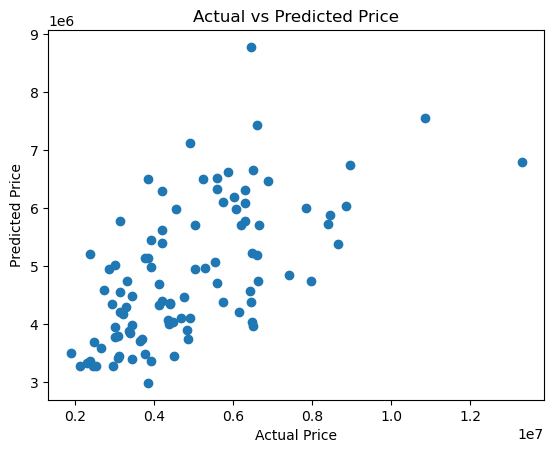

In [68]:
#Visualize Predictions

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


In [86]:
import pandas as pd

new_data = pd.DataFrame([[1000, 4, 2]], columns=['area', 'bedrooms', 'bathrooms'])
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])


Predicted Price: 4588548.121632161


In [112]:
import pandas as pd

new_data = pd.DataFrame([[2000, 5, 4]], columns=['area', 'bedrooms', 'bathrooms'])
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])


Predicted Price: 7658637.590529985
